<a href="https://www.kaggle.com/code/atharvamuley25/maruti-suzuki?scriptVersionId=170128452" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv
/kaggle/input/nifty50-stock-market-data/GRASIM.csv
/kaggle/input/nifty50-stock-market-data/WIPRO.csv
/kaggle/input/nifty50-stock-market-data/stock_metadata.csv
/kaggle/input/nifty50-stock-market-data/BPCL.csv
/kaggle/input/nifty50-stock-market-data/INFY.csv
/kaggle/input/nifty50-stock-market-data/LT.csv
/kaggle/input/nifty50-stock-market-data/RELIANCE.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/INFRATEL.csv
/kaggle/input/nifty50-stock-market-data/HEROMOTOCO.csv
/kaggle/input/nifty50-stock-market-data/HINDUNILVR.csv
/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv
/kaggle/input/nifty50-stock-market-data/MM.csv
/kaggle/input/nifty50-stock-market-data/HDFC.csv
/kaggle/input/nifty50-stock-market-data/JSWSTEEL.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/HINDALCO.csv
/kaggle/input/nifty50-stock-market-data/AXISBANK.csv
/kaggle/inpu

In [2]:
import tensorflow as tf 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

2024-04-03 16:33:39.447977: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 16:33:39.448089: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 16:33:39.607326: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
dataset = pd.read_csv('/kaggle/input/nifty50-stock-market-data/MARUTI.csv')

In [4]:
dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4427 entries, 0 to 4426
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4427 non-null   object 
 1   Symbol              4427 non-null   object 
 2   Series              4427 non-null   object 
 3   Prev Close          4427 non-null   float64
 4   Open                4427 non-null   float64
 5   High                4427 non-null   float64
 6   Low                 4427 non-null   float64
 7   Last                4427 non-null   float64
 8   Close               4427 non-null   float64
 9   VWAP                4427 non-null   float64
 10  Volume              4427 non-null   int64  
 11  Turnover            4427 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4426 non-null   float64
 14  %Deliverble         4426 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 518.9

In [6]:
dataset.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,4.427000e+03,4.427000e+03,2456.000000,4.426000e+03,4426.000000
mean,2923.575085,2927.873074,2962.918432,2889.128066,2924.651604,2925.005094,2926.480642,1.194661e+06,2.395307e+14,55428.511808,3.627677e+05,0.387391
std,2740.532701,2745.541243,2769.986950,2715.403311,2740.438635,2740.723734,2742.675329,1.637957e+06,2.935761e+14,44405.350898,3.681484e+05,0.157139
min,125.000000,164.000000,168.700000,155.000000,164.000000,164.300000,165.060000,2.279600e+04,2.131518e+12,1096.000000,4.896000e+03,0.034300
25%,822.525000,825.100000,840.000000,806.300000,823.025000,822.700000,823.435000,4.263710e+05,6.248277e+13,23089.500000,1.620018e+05,0.267600
50%,1412.450000,1414.000000,1432.000000,1390.350000,1412.200000,1412.600000,1412.210000,6.909590e+05,1.121591e+14,44031.500000,2.717160e+05,0.389900
75%,5097.350000,5100.000000,5192.050000,5006.025000,5104.500000,5104.200000,5114.920000,1.208280e+06,3.141731e+14,73714.500000,4.480182e+05,0.500900
max,9832.450000,9966.000000,9996.400000,9725.000000,9846.000000,9832.450000,9850.960000,3.516428e+07,4.878992e+15,407715.000000,8.537695e+06,1.000000


In [7]:
#Creating a copy
dataset_copy=dataset.copy()

#Coverting date column to datetime data type
dataset_copy['Date'] = dataset_copy['Date'].apply(pd.to_datetime)

#Extracting Month, Week, Day,Day of week
dataset_copy["Month"] = dataset_copy.Date.dt.month
# dataset_copy["Week"] = dataset_copy.Date.dt.week
dataset_copy["Day"] = dataset_copy.Date.dt.day
dataset_copy["Day of week"] = dataset_copy.Date.dt.dayofweek


#Setting date column as index
dataset_copy.set_index("Date", drop=False, inplace=True)
dataset_copy.iloc[:,15:19].head()

,Month,Day,Day of week
Date,,,
2003-07-09,7,9,2
2003-07-10,7,10,3
2003-07-11,7,11,4
2003-07-14,7,14,0
2003-07-15,7,15,1


In [8]:
dataset_copy.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Month,Day,Day of week
Date,,,,,,,,,,,,,,,,,,
2003-07-09,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428,7,9,2
2003-07-10,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170,7,10,3
2003-07-11,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568,7,11,4
2003-07-14,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258,7,14,0
2003-07-15,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118,7,15,1


In [9]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4427 entries, 2003-07-09 to 2021-04-30
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                4427 non-null   datetime64[ns]
 1   Symbol              4427 non-null   object        
 2   Series              4427 non-null   object        
 3   Prev Close          4427 non-null   float64       
 4   Open                4427 non-null   float64       
 5   High                4427 non-null   float64       
 6   Low                 4427 non-null   float64       
 7   Last                4427 non-null   float64       
 8   Close               4427 non-null   float64       
 9   VWAP                4427 non-null   float64       
 10  Volume              4427 non-null   int64         
 11  Turnover            4427 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  4426 non-n

## **Exploratory Data Analysis**

*Exploratory data analysis is a great way of understanding and analyzing the data sets. The EDA technique is extensively used by data scientists and data analysts to summarize the main characteristics of data sets and to visualize them through different graphs and plots. It helps data scientists to search for patterns, spot anomalies, or check assumptions.*

*EDA ensures that results are valid and applicable as per the business goals. Once the EDA task is completed, its features can be used for efficient and better data analysis, modelling, and machine learning.*

## **Volume-weighted average price (VWAP) is a financial metric that measures the average price of a security or asset traded during a trading session, adjusted for the total volume of transactions. It's calculated using the opening price for each day, adjusted in real time until the close of the session. The formula for VWAP is: VWAP = (Cumulative typical price x volume)/cumulative volume.** 

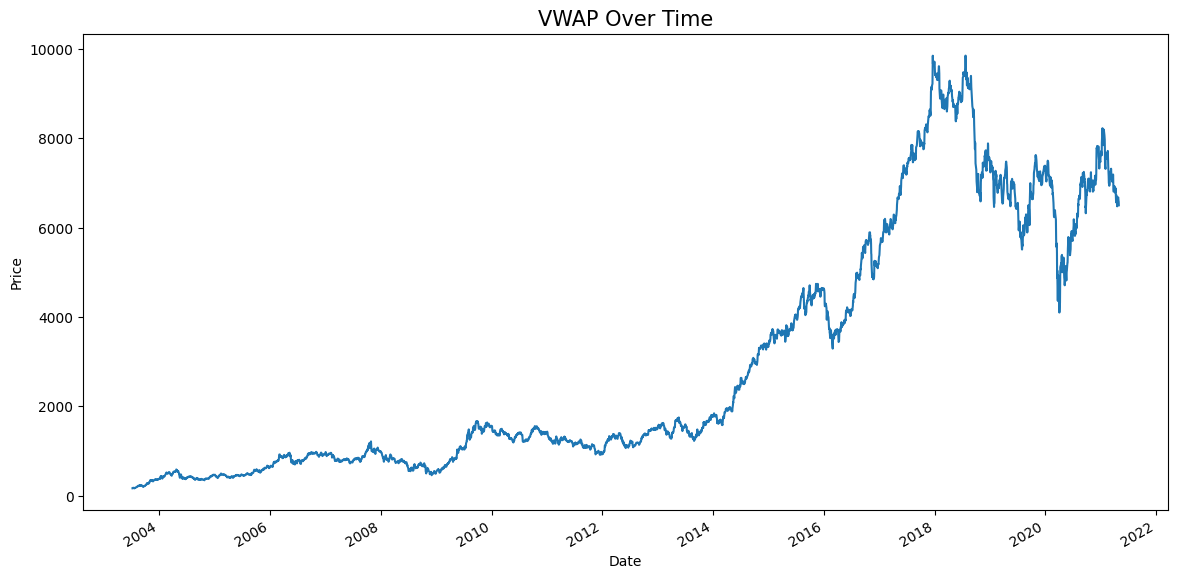

In [10]:
dataset_copy.VWAP.plot(figsize=(14, 7))
plt.title('VWAP Over Time', fontsize=15)
plt.ylabel('Price');

In [11]:
dataset_copy.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Month', 'Day', 'Day of week'],
      dtype='object')

In [12]:
dataset_copy.drop(columns=['Symbol','Series','Deliverable Volume','Trades','%Deliverble','Last','Turnover','Volume'],inplace=True)

In [13]:
dataset_copy.head()

,Date,Prev Close,Open,High,Low,Close,VWAP,Month,Day,Day of week
Date,,,,,,,,,,
2003-07-09,2003-07-09,125.00,164.90,170.40,155.00,164.30,165.95,7,9,2
2003-07-10,2003-07-10,164.30,167.00,168.70,164.50,167.00,166.74,7,10,3
2003-07-11,2003-07-11,167.00,167.75,174.85,166.25,173.35,172.45,7,11,4
2003-07-14,2003-07-14,173.35,174.25,179.25,174.25,177.95,177.91,7,14,0
2003-07-15,2003-07-15,177.95,200.00,200.00,173.00,176.20,176.88,7,15,1


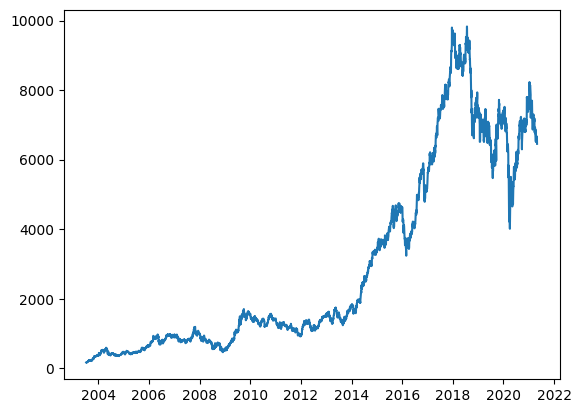

In [14]:
plt.plot(dataset_copy.Date, dataset_copy.Close)
plt.show()

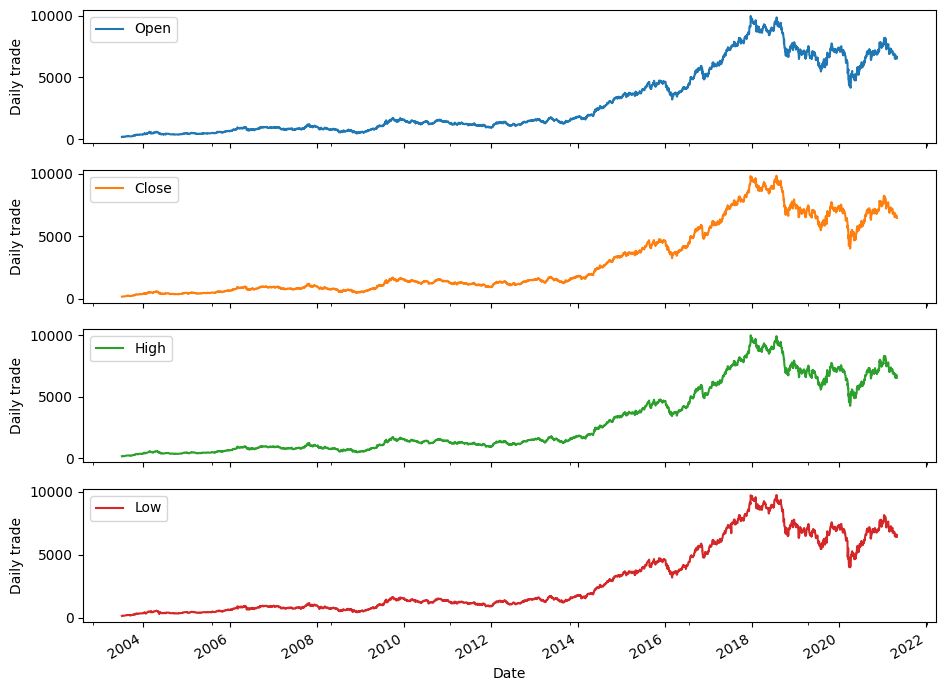

In [15]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = dataset_copy[cols_plot].plot(figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

In [16]:
dataset_copy.set_index(keys='Date', inplace=True)

In [17]:
dataset_copy['Avg_ma_close'] = dataset_copy.iloc[:, 0].expanding(min_periods=3).mean()

In [18]:
dataset_copy.dropna(inplace=True)

## **Data Preprocessing**

In [19]:
X = dataset_copy.drop(columns='Close').values
y = dataset_copy['Close'].values

In [20]:
X

array([[1.67000000e+02, 1.67750000e+02, 1.74850000e+02, ...,
        1.10000000e+01, 4.00000000e+00, 1.52100000e+02],
       [1.73350000e+02, 1.74250000e+02, 1.79250000e+02, ...,
        1.40000000e+01, 0.00000000e+00, 1.57412500e+02],
       [1.77950000e+02, 2.00000000e+02, 2.00000000e+02, ...,
        1.50000000e+01, 1.00000000e+00, 1.61520000e+02],
       ...,
       [6.56875000e+03, 6.56875000e+03, 6.65000000e+03, ...,
        2.80000000e+01, 2.00000000e+00, 2.92192711e+03],
       [6.57380000e+03, 6.63500000e+03, 6.64745000e+03, ...,
        2.90000000e+01, 3.00000000e+00, 2.92275220e+03],
       [6.56565000e+03, 6.53710000e+03, 6.55960000e+03, ...,
        3.00000000e+01, 4.00000000e+00, 2.92357508e+03]])

In [21]:
X.shape

(4425, 9)

In [22]:
y.shape

(4425,)

***RobustScaler is similar to StandardScaler but uses statistics that are robust to outliers. Instead of using the mean and standard deviation, it uses the median and the interquartile range (IQR). The median is more robust to outliers than the mean, and the IQR is not affected by outliers. Therefore, RobustScaler is a better choice when dealing with data that contains outliers.***

***MinMaxScaler scales each feature to a given range, typically between 0 and 1. It does this by subtracting the minimum value of the feature and then dividing by the range (the maximum value minus the minimum value). This method preserves the shape of the original distribution and is less affected by outliers. However, it might not work well if the data does not have a consistent minimum and maximum value, or if the data distribution is not continuous.***

***These scalers are used to ensure that all features have the same scale, which is important for many machine learning algorithms to perform well. The choice of scaler depends on the characteristics of the data, such as whether it contains outliers and the distribution of the data.***

In [23]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
X_robust_scaler = RobustScaler()
Y_robust_scaler = RobustScaler()
X = X_robust_scaler.fit_transform(X)
y = Y_robust_scaler.fit_transform(y.reshape(-1, 1))

In [24]:
x_minmax_scaler = MinMaxScaler()
y_minmax_scaler = MinMaxScaler()
X = x_minmax_scaler.fit_transform(X)
y = y_minmax_scaler.fit_transform(y)

In [25]:
X_train = X[:4000]
X_test = X[4000:]

y_train = y[:4000]
y_test = y[4000:]

In [26]:
X_train.shape

(4000, 9)

In [27]:
y_train.shape

(4000, 1)

In [28]:
X_test.shape

(425, 9)

In [29]:
y_test.shape

(425, 1)

In [30]:
X_train = X_train.reshape((-1,1,9))
X_test = X_test.reshape((-1,1,9))

# **Build Model using RNN & Grated Recurrent Unit (GRU)**

**We will use the Sequential class from keras.models library to define a linear stack of network layers. These form a model.**

**Using the add method, the necessary layers would be added to the model.**

**RNNs have an issue of short-term memory which means if the sequence is long, they tend to leave leave out the earlier ones and only retain information related to the later ones. To remove this problem, GRUs are used. In a way, GRU helps in keeping only the important information in the whole sequence. Initially, we add the GRU layer with necessary parameters.**

**Then, we add a Dropout layer to prevent overfitting of the model.**

**We add another set of GRU and Dropout layers.**

**Post which we add a Dense layer which gives us the fully connected layer. We use the regular sigmoid activation function.**

**In our model, we will use Adam optimizer and consider mean square error as our loss function since ours is a Regression model.**

In [31]:
from sklearn.model_selection import train_test_split
from keras.layers import GRU, Dropout, Dense, Input

In [32]:
model = tf.keras.Sequential([
    Input((1, 9)),
    GRU(units=512, return_sequences=True,activation='sigmoid'),
    Dropout(0.2),
    GRU(units=512,activation='sigmoid'),
    Dropout(0.2),
    Dense(units=1, activation='linear')
])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 1, 512)         │       803,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 512)            │     1,575,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,379,777 (9.08 MB)

 Trainable params: 2,379,777 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience = 10,
    monitor='val_loss'
)

In [35]:
model.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

In [36]:
model.fit(
    X_train,
    y_train,
    batch_size=250, 
    epochs=100, 
    validation_split=0.15,
    callbacks = [early_stopping]
)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 1.6249e-04 - loss: 0.2714 - val_accuracy: 0.0017 - val_loss: 0.0814
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 1.0619e-04 - loss: 0.1130 - val_accuracy: 0.0000e+00 - val_loss: 0.2204
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 5.9729e-05 - loss: 0.0510 - val_accuracy: 0.0000e+00 - val_loss: 0.3859
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 8.1951e-05 - loss: 0.0432 - val_accuracy: 0.0000e+00 - val_loss: 0.3373
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 4.8725e-04 - loss: 0.0355 - val_accuracy: 0.0000e+00 - val_loss: 0.2743
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 1.3286e-04 - loss: 0.0343 - val_accuracy: 0.0000e+00 - val_loss: 0.2685
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 3.9836e-04 - loss: 0.0315 - val_accuracy: 0.0000e+00 - val_loss: 0.2293
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step

In [37]:
model.evaluate(X_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0014


[0.0013522282242774963, 0.0]

In [38]:
y_pred = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [39]:
y_test = y_minmax_scaler.inverse_transform(y_test)
y_pred = y_minmax_scaler.inverse_transform(y_pred) 

y_test = Y_robust_scaler.inverse_transform(y_test)
y_pred = Y_robust_scaler.inverse_transform(y_pred) 

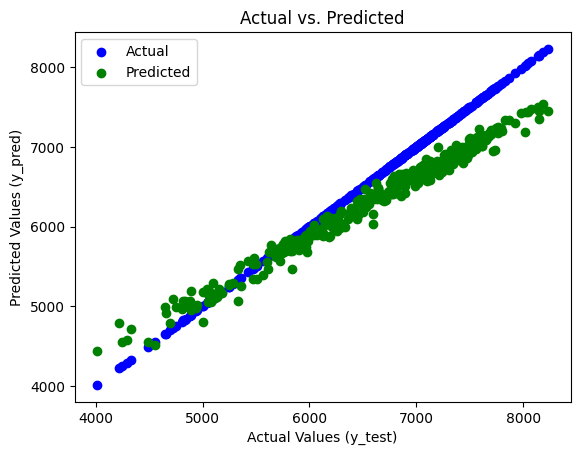

In [40]:
plt.scatter(y_test, y_test, color='blue', label='Actual')  # Plot actual values with blue color
plt.scatter(y_test, y_pred, color='green', label='Predicted')  # Plot predicted values with red color
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted")
plt.legend()
plt.show()